In [2]:
import pandas as pd

## Load the dataset

In [3]:
data = pd.read_csv('Laptop_price.csv')

## Display the first few rows and the info about the dataset

In [4]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


Check for null values

In [6]:
print(data.isnull().sum())

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


There are null values in the dataset.

Descriptive statistics of the dataset

In [7]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Histgrams of all the numerical features

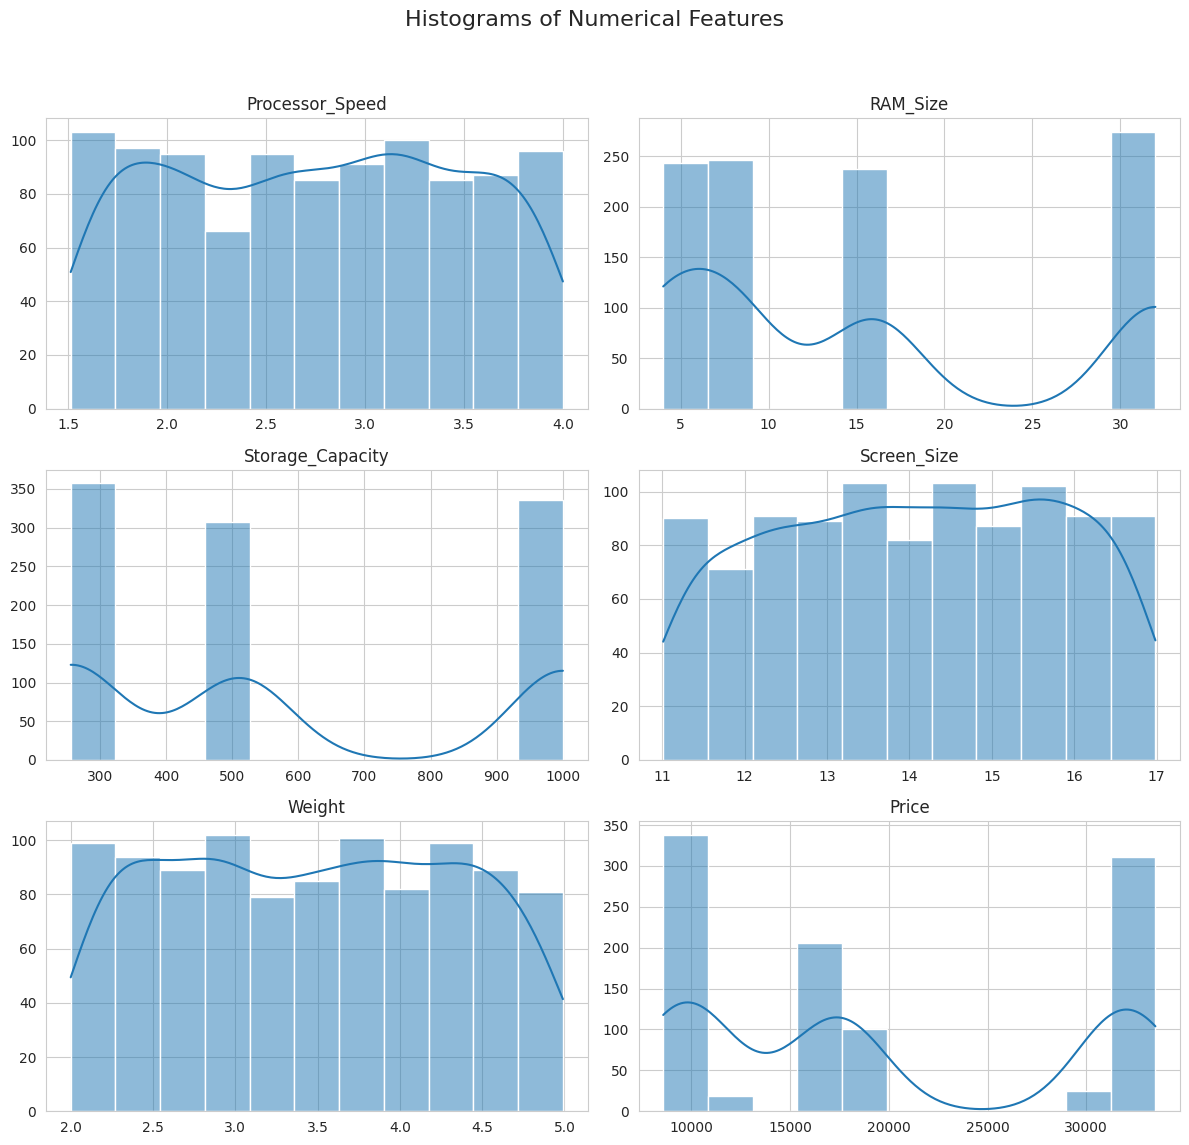

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Numerical Features', fontsize=16)

# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numerical_cols):
  sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(col)
  axes[i//2, i%2].set_xlabel('')
  axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We'll create scatter plots to explore relationships between these variables and the laptop price. It will help us understand which factors might be influencing property prices more significantly.

In [9]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

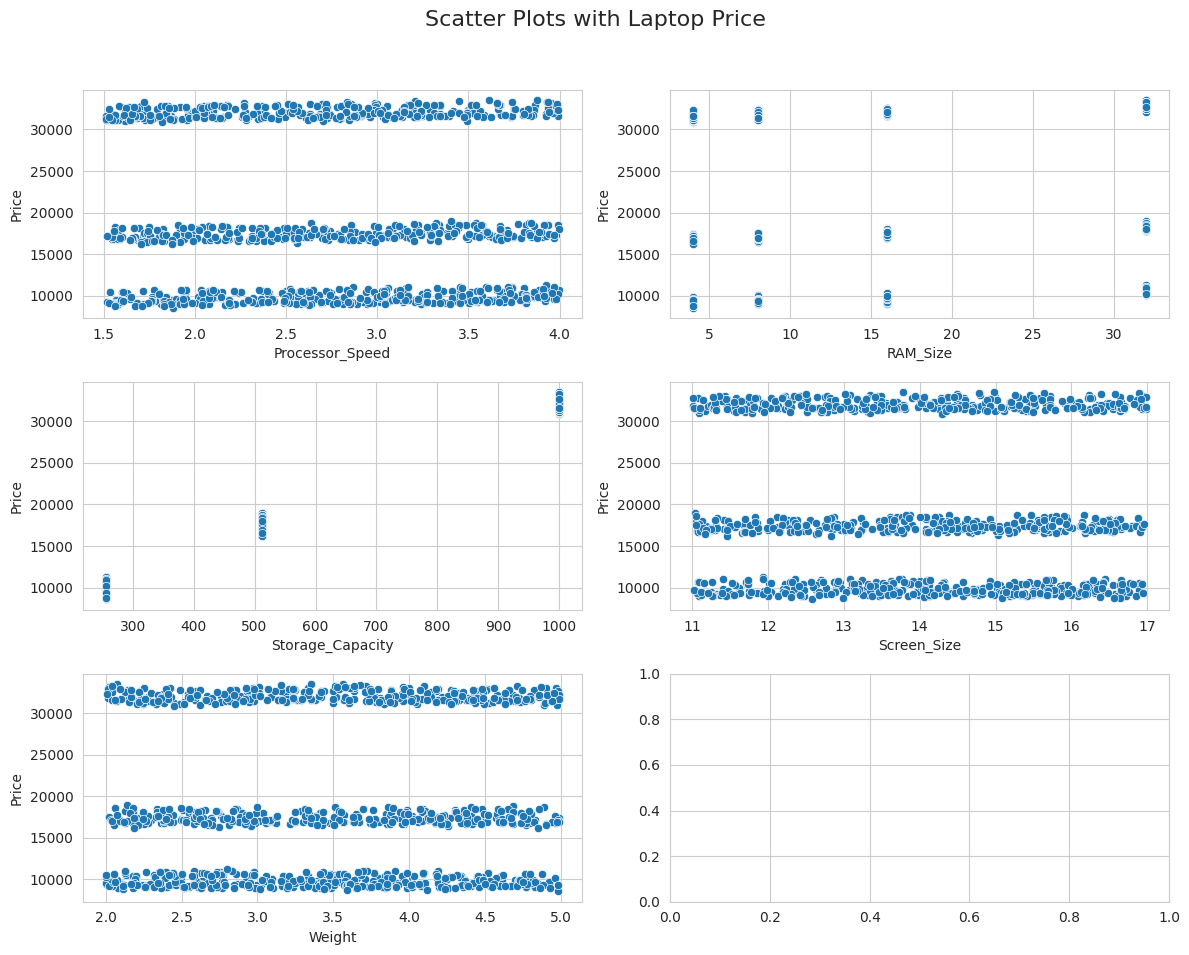

In [10]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with Laptop Price', fontsize=16)

# Scatter plot for each variable agains the house price
sns.scatterplot(data=data, x='Processor_Speed', y='Price', ax=axes[0, 0])
sns.scatterplot(data=data, x='RAM_Size', y='Price', ax=axes[0, 1])
sns.scatterplot(data=data, x='Storage_Capacity', y='Price', ax=axes[1, 0])
sns.scatterplot(data=data, x='Screen_Size', y='Price', ax=axes[1, 1])
sns.scatterplot(data=data, x='Weight', y='Price', ax=axes[2, 0])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Summary of scatter plots
*  **Processor Speed vs. Price:** There
appears to be a general trend where higher processor speeds are associated with higher laptop prices, although there is quite a bit of spread in the data.
* **RAM Size vs. Price:** There seems to be a strong positive correlation between RAM size and price. As RAM size increases, the price of the laptop generally increases significantly. This is a clear indicator that RAM is a major factor influencing price in this dataset.
* **Storage Capacity vs. Price:** Similar to RAM size, there's a noticeable positive relationship between storage capacity and price. Laptops with larger storage capacities tend to have higher prices.
* **Screen Size vs. Price:** The relationship between screen size and price is less clear-cut. While there might be a slight upward trend, the data points are quite scattered, suggesting that screen size alone might not be as strong a predictor of price as RAM or storage.
* **Weight vs. Price:** The scatter plot for wei
ght and price doesn't show a strong linear relationship. There's a wide range of prices for laptops across different weights, indicating that weight might not be a primary driver of price in this dataset.

*In summary, RAM Size and Storage Capacity appear to have the most significant positive relationships with laptop price, while Processor Speed also shows a positive trend. Screen Size and Weight seem to have weaker or less clear relationships with price based on these scatter plots.*

We'll perform a correlation analysis to quantify the relationships between these variables, especially how each one correlates with the laptop price.


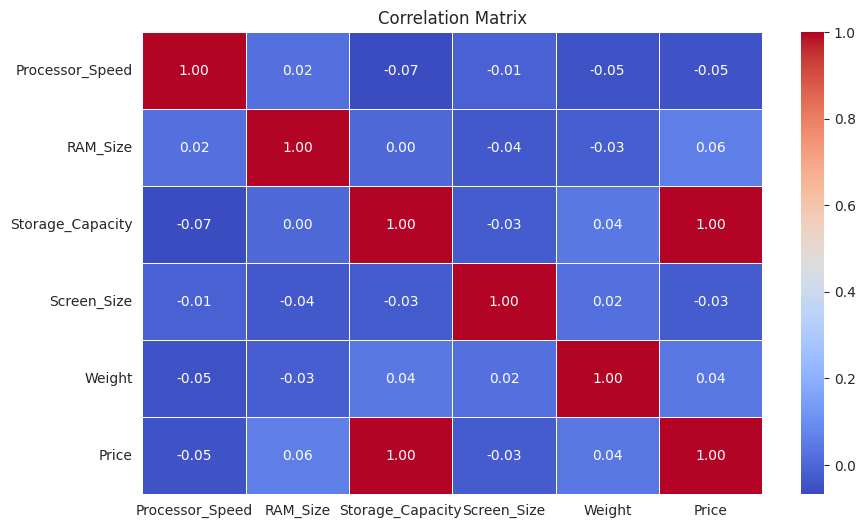

                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.000000  0.021391         -0.067576    -0.013425   
RAM_Size                 0.021391  1.000000          0.002111    -0.036002   
Storage_Capacity        -0.067576  0.002111          1.000000    -0.027560   
Screen_Size             -0.013425 -0.036002         -0.027560     1.000000   
Weight                  -0.054603 -0.025382          0.041335     0.021995   
Price                   -0.050737  0.061237          0.997908    -0.026740   

                    Weight     Price  
Processor_Speed  -0.054603 -0.050737  
RAM_Size         -0.025382  0.061237  
Storage_Capacity  0.041335  0.997908  
Screen_Size       0.021995 -0.026740  
Weight            1.000000  0.038417  
Price             0.038417  1.000000  


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
print(corr_matrix)

## Analysis of Correlation Matrix with Price

Based on the correlation matrix we generated, here's an analysis of how each numerical variable correlates with the laptop 'Price':

*   **Storage_Capacity:** Has the highest positive correlation with Price (approximately 0.998). This indicates a very strong linear relationship, meaning as storage capacity increases, the price of the laptop significantly increases.
*   **RAM_Size:** Shows a positive correlation with Price (approximately 0.061). This is a weak positive linear relationship, suggesting that while larger RAM sizes might be associated with slightly higher prices, it's not a very strong factor on its own based on this matrix.
*   **Weight:** Has a weak positive correlation with Price (approximately 0.038). Similar to RAM size, weight doesn't appear to be a strong linear predictor of price.
*   **Screen_Size:** Shows a very weak negative correlation with Price (approximately -0.027). This indicates almost no linear relationship between screen size and price.
*   **Processor_Speed:** Also shows a weak negative correlation with Price (approximately -0.051). This suggests a very slight tendency for price to decrease as processor speed increases, which seems counter-intuitive and might indicate that processor speed in this dataset is not a primary driver of price compared to other factors like storage capacity.

In summary, the correlation matrix confirms that **Storage_Capacity** has an extremely strong positive linear relationship with Price, dominating the other features in terms of correlation strength. **RAM_Size**, **Weight**, **Screen_Size**, and **Processor_Speed** have much weaker linear relationships with Price in this dataset.

### It's time to build a regression model to predict the laptop prices by using the Linear Regression algorithm.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Selecting features and target variable
features = ['Storage_Capacity', 'RAM_Size', 'Weight', 'Screen_Size', 'Processor_Speed']

target = 'Price'

X = data[features]
y = data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)


LinearRegression()

**Let's visualize the actual versus predicted values to assess how well our model is performing.**

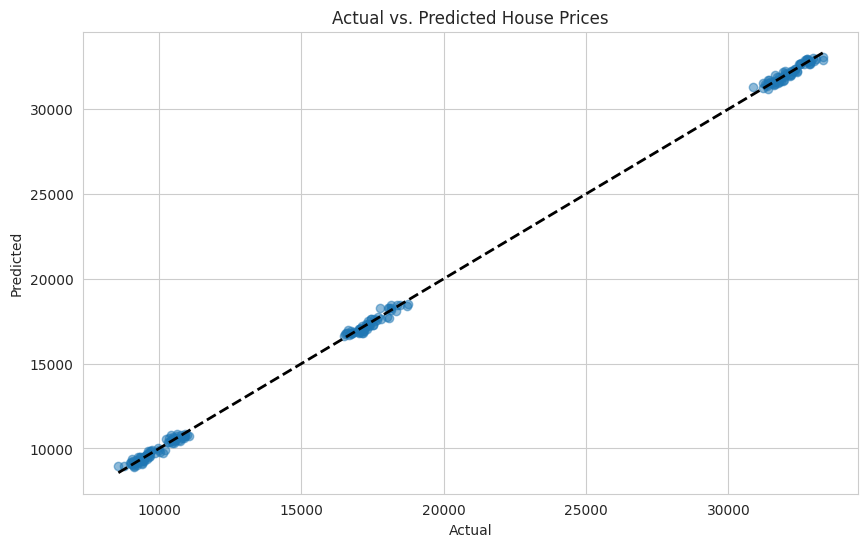

In [33]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()


In [34]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
display(comp)

,Actual,Predicted
521,10900.502075,10749.637771
737,31727.516697,31554.707826
740,9636.022750,9642.104252
660,9412.599857,9235.488560
411,31641.105861,32023.188991
...,...,...
408,17768.373308,18253.596854
332,9411.265536,9253.175247
208,10474.260991,10704.543111
613,32968.612111,33032.458187


In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 32031.539130628244
R-squared (R2) Score: 0.9996472163447738


Mean Squared Error (MSE): 32031.539130628244
R-squared (R2) Score: 0.9996472163447738

Analysis of Model Performance:
The R-squared (R2) score of 0.9996 indicates that approximately 99.96% of the variance in laptop prices can be explained by the independent variables (Processor_Speed, RAM_Size, Storage_Capacity, Screen_Size, Weight) in this linear regression model.

Interpretation of High R2 Score:
A very high R2 score like 0.9996 is often indicative of a strong fit, but in the context of our earlier correlation analysis, where 'Storage_Capacity' showed an extremely high correlation with 'Price' (approx. 0.998), this result is expected.
The model is likely heavily relying on the 'Storage_Capacity' feature to predict the price, as it appears to be almost linearly related in this dataset.
This high correlation between 'Storage_Capacity' and 'Price' explains the near-perfect R2 score. While this indicates the model can predict the 'Price' well based on these features, it also suggests that 'Storage_Capacity' is the dominant factor driving the price in this dataset.
It's important to consider if this relationship is truly representative or potentially a characteristic of the dataset itself.

Potential Improvements and Considerations Given the High R2 Score:

1. Potential Limitations and Considerations:
- The exceptionally high R2 score (0.9996) strongly suggests that 'Storage_Capacity' is the overwhelming driver of price in this dataset due to its near-perfect linear relationship (correlation of 0.998).
- While the model is highly predictive for this specific dataset, this strong relationship might not be universally representative of all laptop markets or pricing strategies. It's worth considering if this is a characteristic of data collection or a specific market segment.
- The high R2 might mask the individual contributions of other features like RAM Size, Processor Speed, Screen Size, and Weight, as their impact on price is minimal compared to Storage Capacity in this dataset.

2. Exploring Alternative Modeling Approaches:
- If the goal was to understand the nuanced impact of *all* features on price, rather than just achieving high predictive accuracy based on the dominant feature, exploring other models might be insightful.
- While Linear Regression performed well due to the strong linear relationship with Storage Capacity, models like decision trees or random forests could reveal non-linear relationships or interactions between features, although with the current data structure, they might still heavily prioritize Storage Capacity.

3. Potential Feature Engineering Steps (for future iterations):
- Given the current R2, feature engineering might not significantly improve *predictive performance* for this dataset, but it could offer alternative perspectives or prepare the model for more diverse data.
- Examples include creating interaction terms (e.g., RAM size * Processor Speed) to see if combinations of features have a synergistic effect on price.
- Polynomial features could capture non-linear relationships, although the current strong linearity with Storage Capacity makes this less critical for this dataset.
- One-hot encoding the 'Brand' categorical variable could be explored to see if specific brands have a significant impact on price beyond the numerical features, although our initial analysis focused only on numerical features.

4. Considering Regularization Techniques:
- Regularization techniques like Ridge or Lasso Regression are typically used to prevent overfitting, especially when dealing with multicollinearity or a large number of features.
- While our correlation matrix didn't show strong multicollinearity among the *other* predictors (excluding the target 'Price'), if we were to include more features or if a simpler model was desired, regularization could be considered.
- Lasso, in particular, can help with feature selection by shrinking the coefficients of less important features to zero, which could explicitly show which features (beyond Storage Capacity) are contributing most to the price.

Summary of Notebook Analysis:

1.  **Data Loading and Exploration:** The analysis began by loading the 'Laptop_price.csv' dataset into a pandas DataFrame. Initial exploration involved displaying the first few rows and checking the data types and non-null counts using `.head()` and `.info()`. The dataset contains 1000 entries with 7 columns: 'Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', and 'Price'. A check for null values confirmed that there were no missing entries in any column. Descriptive statistics were generated using `.describe()`, providing insights into the central tendency, dispersion, and shape of the numerical features.

2.  **Visualization:** Histograms were plotted for all numerical features ('Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', and 'Price') to visualize their distributions. Scatter plots were then created to explore the relationships between each of the independent numerical variables and the target variable, 'Price'. These plots visually suggested positive relationships between 'Price' and 'Processor_Speed', 'RAM_Size', and 'Storage_Capacity', while the relationships with 'Screen_Size' and 'Weight' appeared less clear.

3.  **Correlation Analysis:** A correlation matrix was computed for all numerical features to quantify the linear relationships between them. A heatmap was used to visualize this matrix. The analysis of the correlation matrix revealed a very strong positive linear correlation (approximately 0.998) between 'Storage_Capacity' and 'Price'. 'RAM_Size' showed a weak positive correlation, while 'Processor_Speed', 'Screen_Size', and 'Weight' had very weak or negligible correlations with 'Price'. This confirmed the visual findings from the scatter plots, highlighting 'Storage_Capacity' as the dominant feature linearly related to price in this dataset.

4.  **Model Building:** A linear regression model was built to predict laptop prices. The numerical features ('Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight') were selected as independent variables (X), and 'Price' was selected as the target variable (y). The dataset was split into training (80%) and testing (20%) sets using `train_test_split`. A `LinearRegression` model was initialized and trained on the training data.

5.  **Model Evaluation:** The trained model was used to make predictions on the test set. The actual and predicted prices were visualized using a scatter plot and displayed in a DataFrame for comparison. The model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R2) score. The MSE was approximately 32031.54, and the R2 score was approximately 0.9996. The exceptionally high R2 score indicates that the model explains about 99.96% of the variance in laptop prices, largely attributed to the strong correlation between 'Storage_Capacity' and 'Price'.


## Summary:

### Q&A

*   **What does the R2 score mean in this instance?**
    In this instance, the R-squared (R2) score of approximately 0.9996 means that about 99.96% of the variance in laptop prices can be explained by the independent variables included in the linear regression model (Processor\_Speed, RAM\_Size, Storage\_Capacity, Screen\_Size, and Weight). However, the analysis revealed that this exceptionally high R2 is primarily due to the extremely strong positive linear correlation between 'Storage\_Capacity' and 'Price' (approximately 0.998) in this dataset.

### Data Analysis Key Findings

*   The linear regression model achieved a Mean Squared Error (MSE) of approximately 32031.54 and a remarkable R-squared (R2) score of approximately 0.9996.
*   The R2 score of 0.9996 indicates that about 99.96% of the variability in laptop prices is explained by the model's features.
*   The analysis strongly suggests that the near-perfect R2 score is largely driven by the very high positive correlation (approximately 0.998) between 'Storage\_Capacity' and 'Price', making 'Storage\_Capacity' the dominant predictor in this dataset.
*   Other features like 'RAM\_Size', 'Processor\_Speed', 'Screen\_Size', and 'Weight' show much weaker correlations with 'Price' compared to 'Storage\_Capacity'.

### Insights or Next Steps

*   The model's high performance is heavily reliant on 'Storage\_Capacity'; explore if this relationship is representative of a broader market or specific to the dataset.
*   Consider exploring alternative modeling approaches (e.g., decision trees, random forests) or regularization techniques (e.g., Lasso Regression) to understand the individual contributions of features beyond 'Storage\_Capacity' and potentially simplify the model or reveal non-linear relationships.
